# Descriptive general image visualization
While working with any data, visualization is one of the key aspects to understand it more deeply. It is even more so the case when your data is image data.

In this tutorial, we will see how to use `seaborn-image` to perform some basic descriptive visualizations of image data. Throughout this tutorial, we will use the `imgplot()` function which is an axes-level function. `imgplot()` provides a lot of functionalities to handle and display different kinds of images. 

In [1]:
import seaborn_image as isns
import numpy as np # for loading 
%matplotlib inline

isns.set_context("notebook")

C:\Users\sarth\Anaconda3\envs\seaborn-image-test\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


We will first take a look at a sample polymer image. After we load the image, all we have to do is call the `imgplot()` function.
Using the `imgplot` function does a few things by default other than simply plotting the image - 
- Calculates and displays descriptive statistics for the given image. Under the hood, `imgplot` uses `scipy.stats` to provide the statistics.
- Adds a colorbar by default
- Hides the image x-y ticks
- Despines the image and colorbar axes

We will see how the defaults can be changed later in the tutorial.

No. of Obs. : 65536
Min. Value : -8.2457214e-09
Max. Value : 4.3714035e-08
Mean : 7.456410761947064e-09
Variance : 9.202680396572864e-17
Skewness : 0.4774518053893361


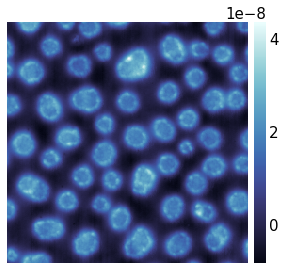

In [2]:
data = np.loadtxt("../../data/PolymerImage.txt", skiprows=1)

_ = isns.imgplot(data)

As mentioned above, just by calling the `imgplot()` function we got some basic descriptive statistics about our data. We can control this using the `describe` parameter. Setting the `describe` parameter to `False` hides the statistical description of our data.

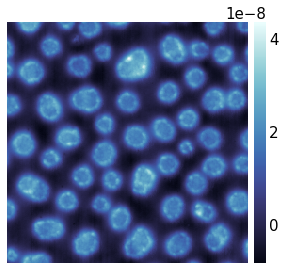

In [3]:
_ = isns.imgplot(data, describe=False)

So far our image doesn't tell us anything about the physical size of the features we are seeing in the image. To achieve this, we can add a scalebar to the image that provides information about the physical size. We simply need to sepcify the size-per-pixel or `dx` and the `units` in the `imgplot()` function.

No. of Obs. : 65536
Min. Value : -8.2457214e-09
Max. Value : 4.3714035e-08
Mean : 7.456410761947064e-09
Variance : 9.202680396572864e-17
Skewness : 0.4774518053893361


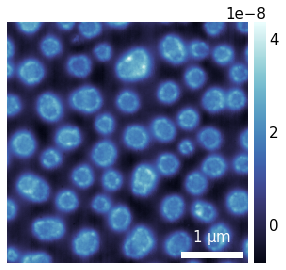

In [4]:
_ = isns.imgplot(data, dx=15, units="nm")

Another missing information while looking at the image is the colorbar label. We can add a colorbar label by specifying `cbar_label` parameter to the `imgplot()` function.

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


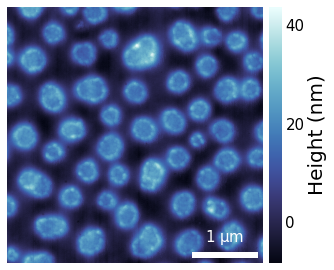

In [5]:
_ = isns.imgplot(data*1e9, dx=15, units="nm", cbar_label="Height (nm)")

As mentioned above, by default, `imgplot()` despines the image and colorbar axis. We can change that by simply specifying `despine = False` in the `imgplot()` function.

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


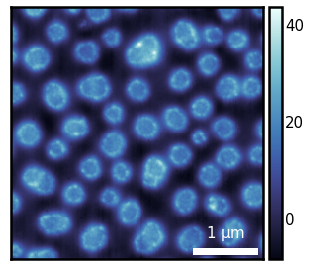

In [6]:
_ = isns.imgplot(data*1e9, dx=15, units="nm", despine=False)

We can further customize the look of our image by changing the colormap. All matplotlib colormaps can be used and in addition, there are some extra colormaps that come with `seaborn-image`. Colormaps can be changed using the `cmap` parameter.

No. of Obs. : 65536
Min. Value : -8.2457214
Max. Value : 43.714034999999996
Mean : 7.456410761947062
Variance : 92.02680396572863
Skewness : 0.47745180538933696


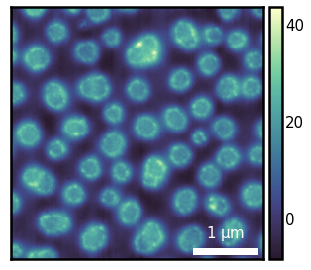

In [7]:
_ = isns.imgplot(data*1e9, cmap="deep", dx=15, units="nm", despine=False)

## Image with outlier points

Often, the data collected is not perfect. It may have some outlier data points which can easily throw off the entire colormap during visualization. `imgplot` provides an easy way to work with such data. Simply by providing the `robust` parameter, the outliers are handled. By default, `robust=True` plots the 2nd and the 98th percentile of the data. The percentiles can be further tuned using the `perc` parameter.

In [8]:
# first let's add some outliers in our data
data[0,0] = 8e-8

No. of Obs. : 65536
Min. Value : -8.2457214e-09
Max. Value : 8e-08
Mean : 7.457574873133281e-09
Variance : 9.210689001152695e-17
Skewness : 0.48305630102204483


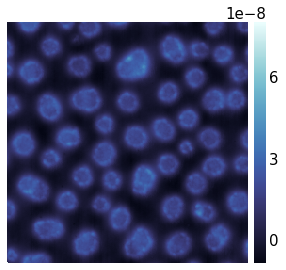

In [9]:
_ = isns.imgplot(data)

As seen in the above image, just because one of our pixels have an outlier value, the entire colormap is scaled according to the outlier value. We can now correct for this using the `robust` parameter.

No. of Obs. : 65536
Min. Value : -8.2457214e-09
Max. Value : 8e-08
Mean : 7.457574873133281e-09
Variance : 9.210689001152695e-17
Skewness : 0.48305630102204483


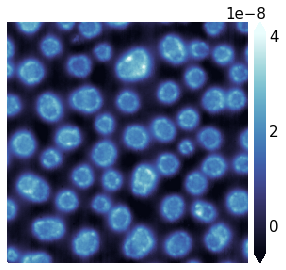

In [10]:
_ = isns.imgplot(data, robust=True, perc=(2,99.99))

Using the `robust` parameter recalculates the colormap range and appropriately extends the colorbar. We can further tune the `robust` beahvior and the colormap rescaling using the `vmin` and `vmax` paramter. By default, `imgplot` prioritizes the `vmin` and the `vmax` parameter over the `robust` parameter.

No. of Obs. : 65536
Min. Value : -8.2457214e-09
Max. Value : 8e-08
Mean : 7.457574873133281e-09
Variance : 9.210689001152695e-17
Skewness : 0.48305630102204483


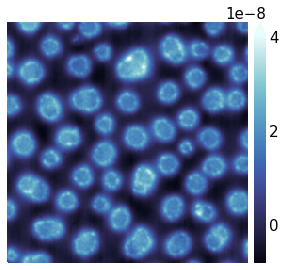

In [13]:
_ = isns.imgplot(data, vmin=-8e-9, robust=True, perc=(2,99.99))

As seen in the above image, specifying the `vmin` parameter ignores the `robust` option for the lower value. `imgplot()` handles the colorbar extension accordingly. The same is true when `vmax` is specified. If both `vmin` and `vmax` are specified, `robust` parameter is completely ignored.

## Working with RGB images

`impgplot()` also allows RGB images as input. By passing a RGB image as input to `imgplot()`, only one default behavior altered - colorbar is no longer displayed for the image. 

No. of Obs. : 786432
Min. Value : 0
Max. Value : 255
Mean : 114.59900410970052
Variance : 6598.380953370378
Skewness : -0.10452421555212746


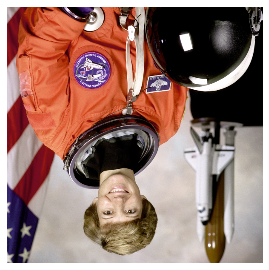

In [15]:
from skimage.data import astronaut

_ = isns.imgplot(astronaut())

RGB images can also be easily converted to grayscale images by specifying `gray=True` parameter in `imgplot()`. Under the hood, this uses `scikit-image`'s `rgb2gray()` function.

No. of Obs. : 262144
Min. Value : 0.0
Max. Value : 1.0
Mean : 0.44195368474025365
Variance : 0.08735896492146458
Skewness : -0.15664890900123057


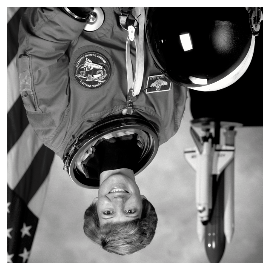

In [18]:
_ = isns.imgplot(astronaut(), gray=True)

The `gray` parameter also has additional implications when the image provided is not a RGB image. If `cmap` is `None`, the colormap defaults to a gray colormap. If `cmap` is not `None`, `cmap` parameter takes precedence. 

No. of Obs. : 65536
Min. Value : -8.2457214e-09
Max. Value : 8e-08
Mean : 7.457574873133281e-09
Variance : 9.210689001152695e-17
Skewness : 0.48305630102204483


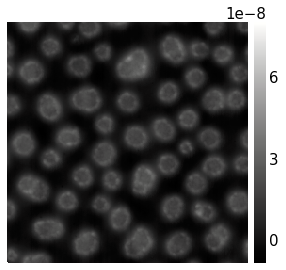

In [23]:
_ = isns.imgplot(data, gray=True)